# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the data
train_df=pd.read_csv("train_qWM28Yl.csv")
test_df=pd.read_csv("test_zo1G9sv.csv")

In [3]:
#take a look at the train data
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
#shape of the data
train_df.shape

(58592, 44)

In [5]:
test_df.shape

(39063, 43)

# Data Cleansing

In [6]:
# check missing values
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [7]:
# check missing values for test data
test_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

/var/folders/4p/rtnyntns6_l1zn502sp8d1j80000gn/T/ipykernel_25780/1753782207.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.age_of_car)
/var/folders/4p/rtnyntns6_l1zn502sp8d1j80000gn/T/ipykernel_25780/1753782207.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df.age_of_car)

Text(0.5, 1.0, 'Distribution of Age - Test data')

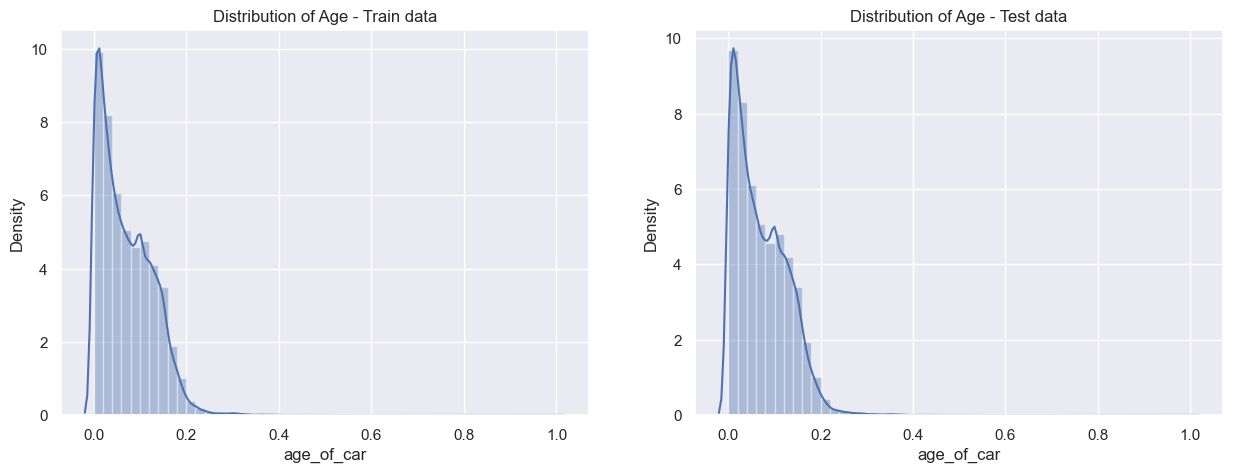

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_df.age_of_car)
plt.title("Distribution of Age - Train data")
plt.subplot(1,2,2)
sns.distplot(test_df.age_of_car)
plt.title("Distribution of Age - Test data")


In [9]:
# feature engieering
# replace Yes and No with Binary Encoding
train_df.replace(('Yes', 'No'), (1, 0), inplace=True)
test_df.replace(('Yes', 'No'), (1, 0), inplace=True)

In [11]:
# segregating features by category types
feature_bin = [f for f in train_df.columns if (f.startswith('is_')) & (f not in ['is_claim'])]
feature_cat = [i for i in (train_df.select_dtypes(include=['object']).columns) if i not in ['policy_id']]
feature_els = [f for f in train_df.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['policy_id', 'is_claim'])]

In [12]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
for i in feature_cat:
    train_df[i] = le.fit_transform(train_df[i])

In [13]:
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,ID00002,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,ID00003,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,ID00004,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,ID00005,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0


In [14]:
feature_cat_test = [i for i in (test_df.select_dtypes(include=['object']).columns) if i not in ['policy_id']]
feature_cat_test

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'rear_brakes_type',
 'transmission_type',
 'steering_type']

In [15]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
for i in feature_cat_test:
    test_df[i] = le.fit_transform(test_df[i])

In [16]:
test_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,15,4076,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,ID58594,0.307241,0.13,0.442308,20,8794,1,2,7,2,...,0,1,1,1,1,1,1,1,1,2
2,ID58595,0.327924,0.12,0.451923,20,8794,2,0,4,2,...,0,0,1,1,1,0,1,1,1,2
3,ID58596,0.782654,0.01,0.461538,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,ID58597,1.233404,0.02,0.634615,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Distribution

In [17]:
# declare target and features
features = [i for i in (train_df.columns) if i not in ['policy_id','is_claim']]
target=train_df.is_claim

In [18]:
target

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

/var/folders/4p/rtnyntns6_l1zn502sp8d1j80000gn/T/ipykernel_25780/3042090201.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[features[i]],kde_kws={'bw': 0.1})
/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:2517: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/4p/rtnyntns6_l1zn502sp8d1j80000gn/T/ipykernel_25780/3042090201.py:5: UserWarning: 

`distplot` is a de

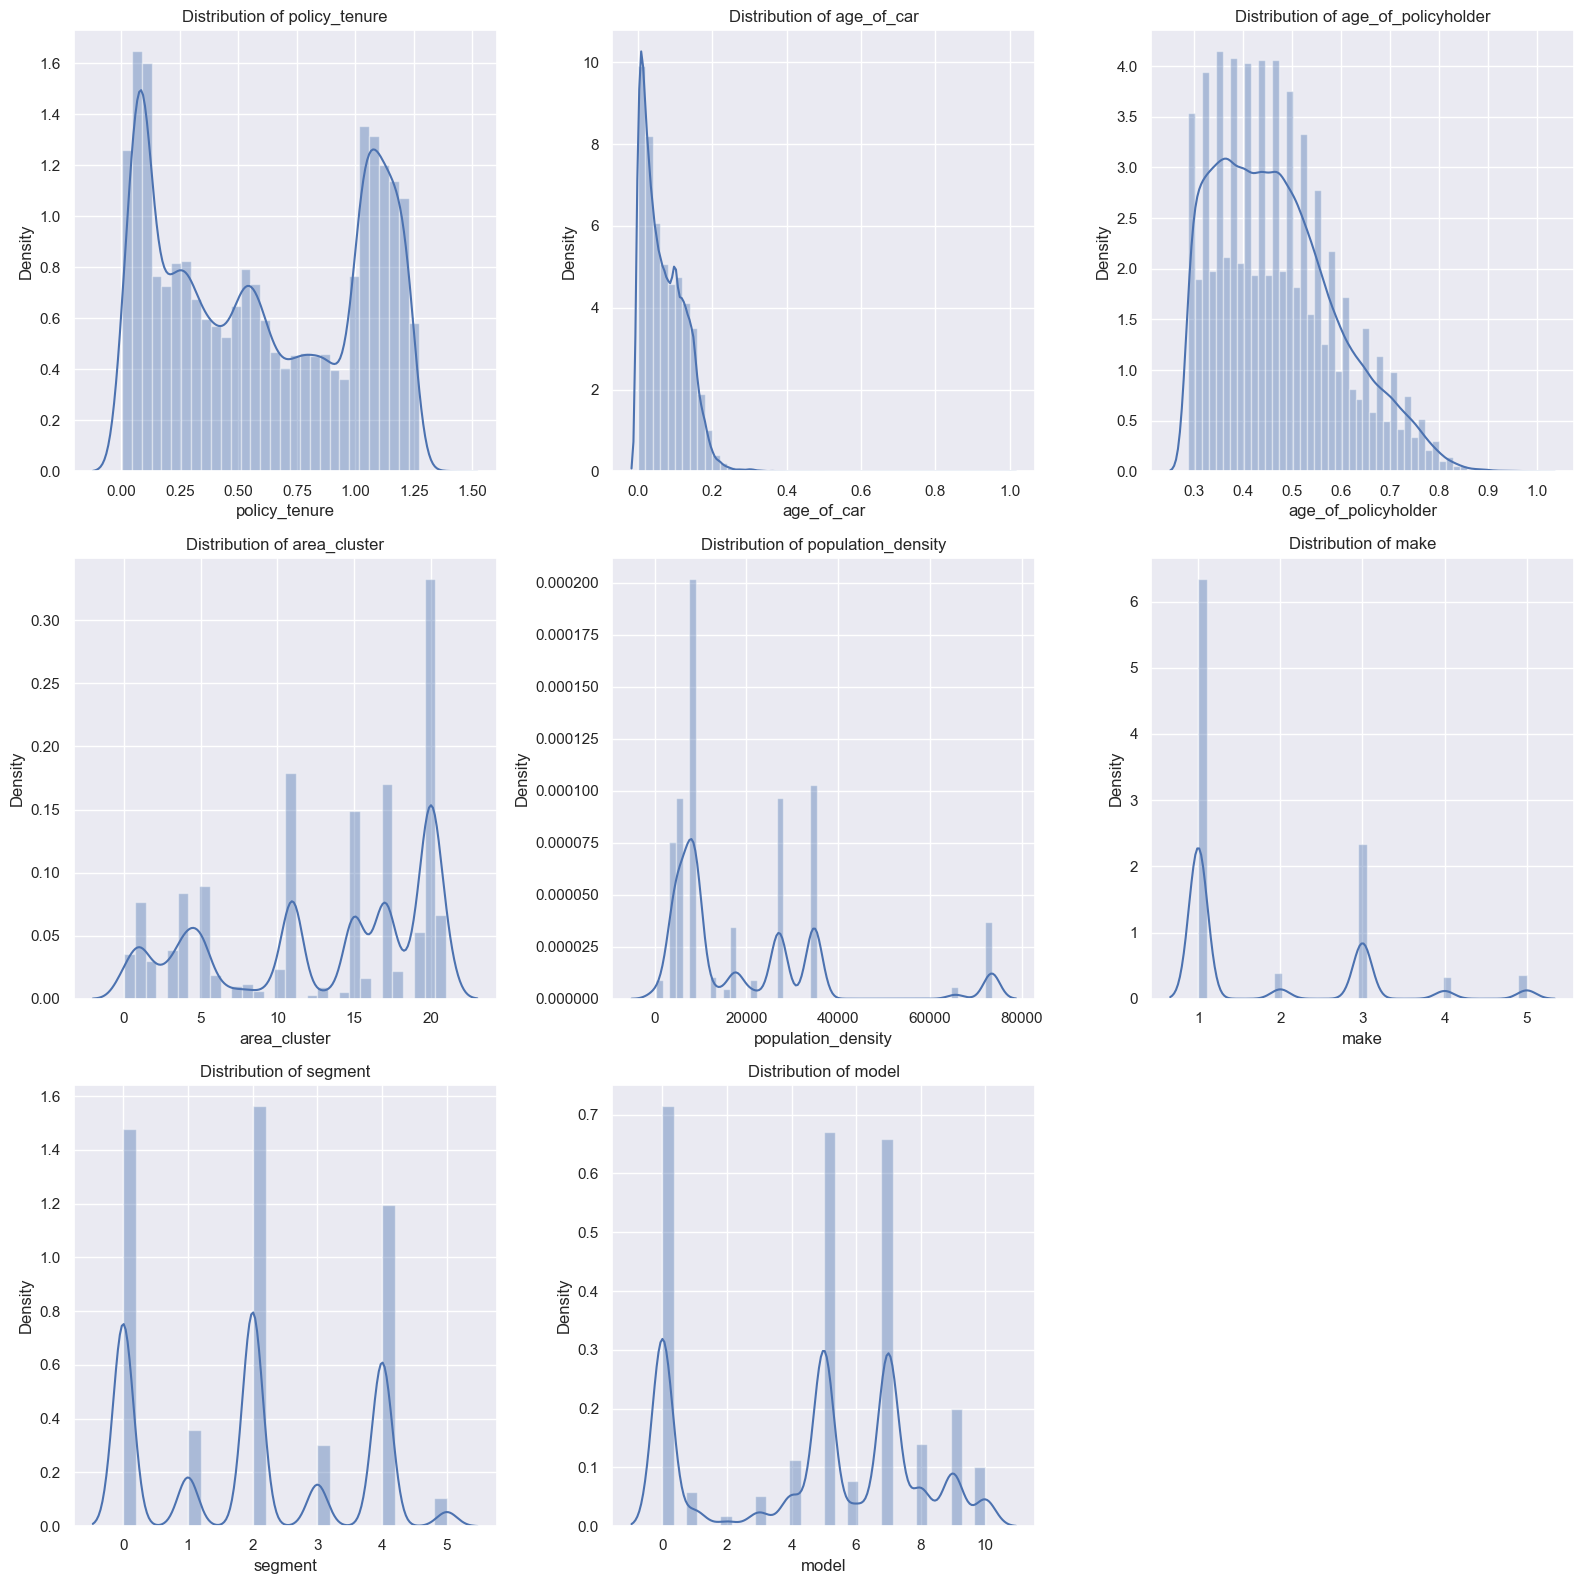

In [19]:
# distribution of features
plt.figure(figsize=(16,16))
for i in range(0,8):
    plt.subplot(3,3,i+1)
    sns.distplot(train_df[features[i]],kde_kws={'bw': 0.1})
    plt.title("Distribution of {}".format(features[i]))
plt.tight_layout()


/var/folders/4p/rtnyntns6_l1zn502sp8d1j80000gn/T/ipykernel_25780/462502975.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<AxesSubplot:xlabel='is_claim', ylabel='Density'>

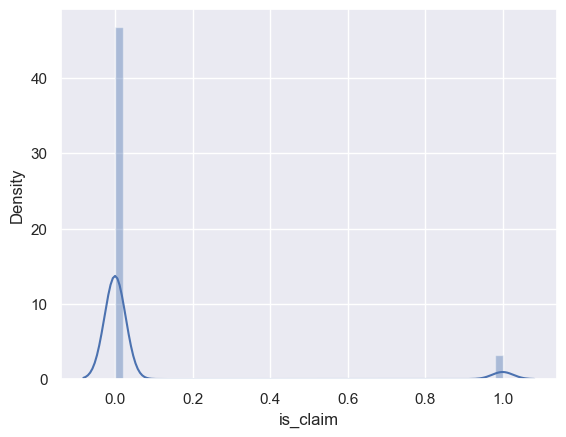

In [20]:
# target distribution
sns.distplot(target)
# we can see those two classes are not balanced
# I will use upsampling methods for the train data

# Exploratory Data Analysis

In [21]:
cat = feature_cat
num = feature_els

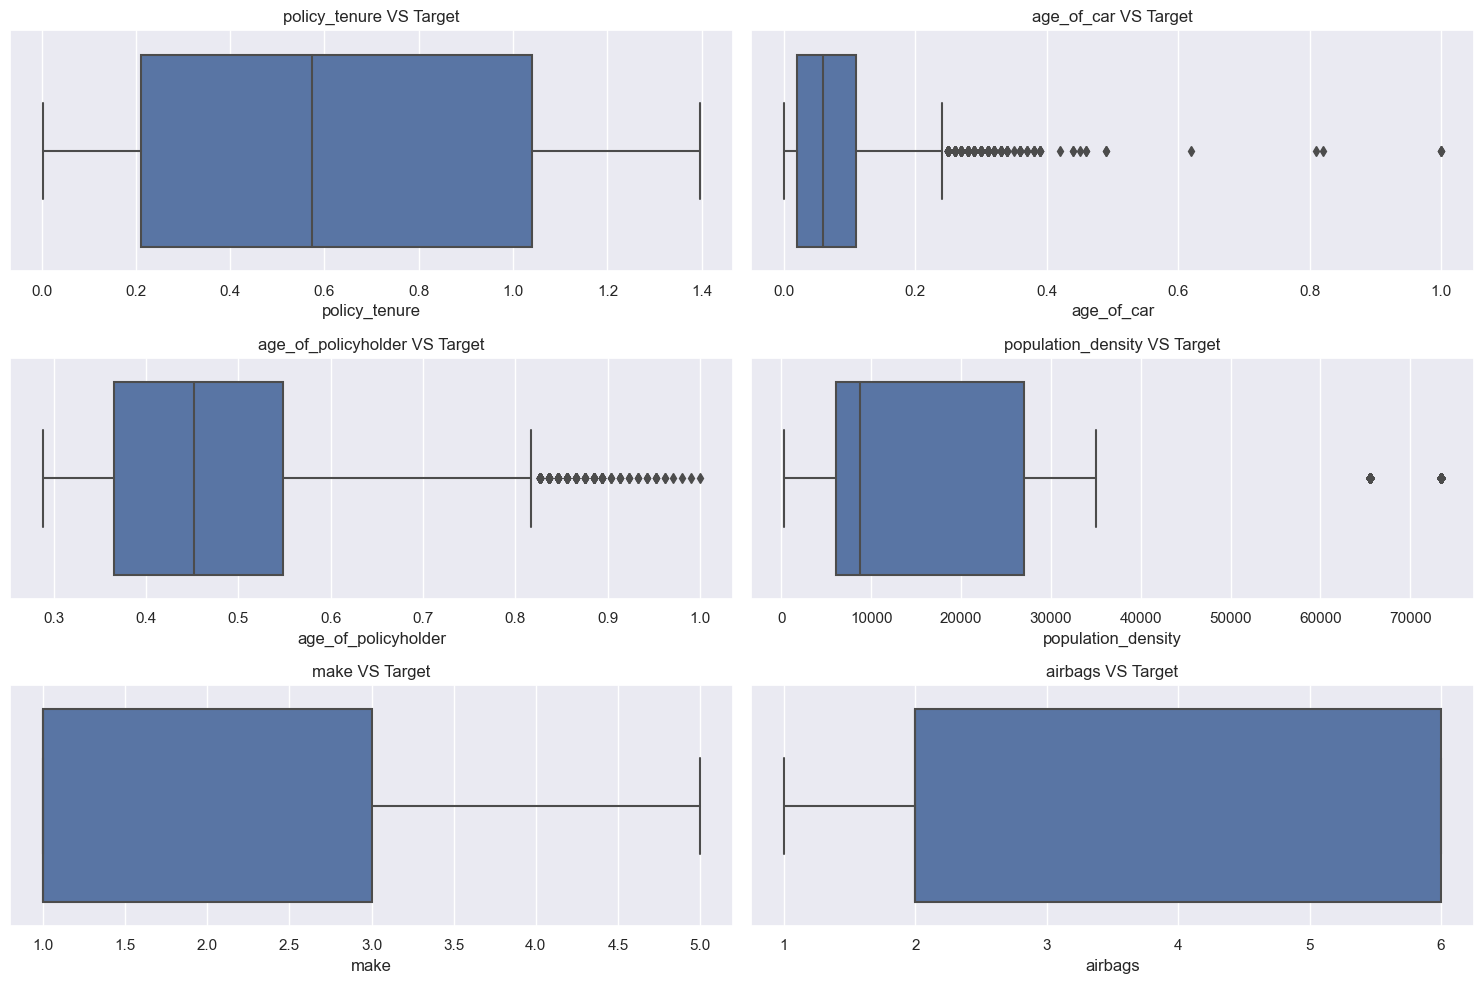

In [31]:
# catogorical data vs target
plt.figure(figsize=(15,10))
for i in range(len(num)):
    try:
        plt.subplot(3,2,i+1)
        sns.boxplot(x=num[i], hue ='is_claim', data = train_df)
        plt.title("{} VS Target".format(num[i]))
    except ValueError as ve:
        pass
plt.tight_layout()
    

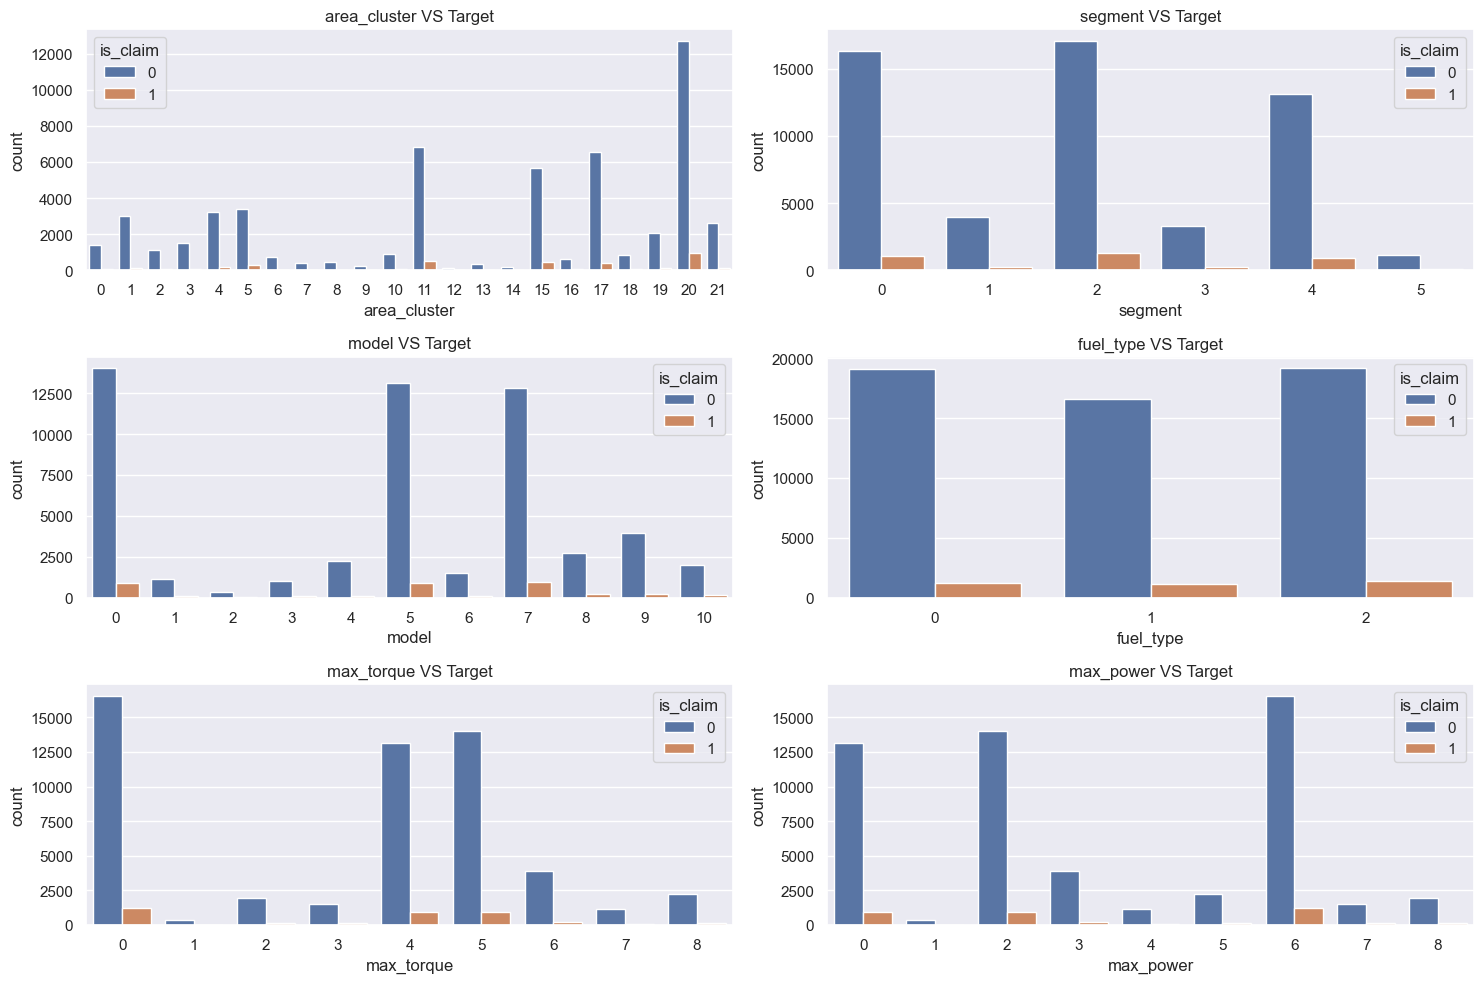

In [32]:
# catogorical data vs target
plt.figure(figsize=(15,10))
for i in range(len(cat)):
    try:
        plt.subplot(3,2,i+1)
        sns.countplot(x=cat[i], hue ='is_claim', data = train_df)
        plt.title("{} VS Target".format(cat[i]))
    except ValueError as ve:
        pass
plt.tight_layout()
    


# Resampling

In [33]:
from sklearn.utils import resample

In [34]:
# concatenate our training data back together
training  = pd.DataFrame()
training[train_df[features].columns] = train_df[features]
training['is_claim'] = target
training.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0


In [36]:
# separate minority and majority classes
zero = training[training.is_claim==0]
one = training[training.is_claim==1]

In [37]:
# Get a class count to understand the class imbalance.
print('zero count: '+ str(len(zero)))
print('one count: '+ str(len(one)))

zero count: 54844
one count: 3748


In [38]:
# upsample minority
one_upsampled = resample(one, # minority 
                          replace=True, # sample with replacement
                          n_samples=len(zero), # match number in majority class
                          random_state=23) # reproducible results
one_upsampled.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
9019,1.218756,0.02,0.490385,3,34791,1,2,8,2,0,...,1,1,1,1,1,1,1,1,0,1
11453,1.092617,0.08,0.625000,20,8794,1,2,7,2,0,...,1,1,1,1,1,1,1,1,2,1
16263,0.577806,0.13,0.288462,19,6112,1,1,9,0,6,...,0,1,1,1,0,0,1,1,2,1
31040,0.499144,0.16,0.519231,11,27003,3,4,5,1,4,...,1,1,1,1,1,0,1,1,3,1
46731,0.788200,0.02,0.298077,9,35036,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,1


In [40]:
# combine majority and upsampled minority
upsampled= pd.concat([zero, one_upsampled])

# check new class counts
upsampled.is_claim.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

# Train Test Split

In [41]:
#Defining training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(upsampled.drop('is_claim', axis=1), 
                                                  upsampled.is_claim, 
                                                  test_size=0.25, 
                                                  random_state=1) 


In [42]:
x_train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
25437,0.564673,0.10,0.576923,20,8794,1,2,7,2,0,...,0,1,1,1,1,1,1,1,1,2
2305,0.631427,0.08,0.509615,17,34738,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
50967,0.414061,0.03,0.346154,15,4076,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
41527,1.205304,0.11,0.375000,17,34738,3,4,5,1,4,...,1,1,1,1,1,1,0,1,1,3
52581,1.188024,0.10,0.394231,4,5410,1,2,8,2,0,...,1,1,1,1,1,1,1,1,1,0


In [43]:
test_data=test_df[features]

# Generating the Base First-Level Models


In [44]:
# Model Stacking method will be applied in this section

In [45]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## KNN Model

### RandomizedSearchCV

In [71]:
random_gridknn={'n_neighbors':list(range(1,100))}
knn= KNeighborsClassifier()
gs_knn=GridSearchCV(knn,random_gridknn,cv=10 )
gs_knn.fit(x_train,y_train)
gs_knn.best_params_,gs_knn.best_score_

({'n_neighbors': 1}, 0.9548415461817961)

In [72]:
knn_final = KNeighborsClassifier(n_neighbors=1)
knn_final.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Scores for Train and Validation data

In [73]:
knn_y_train_pre=knn_final.predict(x_train)
print('accuracy_score of train data :{}'.format (accuracy_score(y_train,knn_y_train_pre)))
print('f1_score of train data:{}'.format(f1_score(y_train,knn_y_train_pre))) 
# # make class predictions for the testing set
knn_y_val_pre = knn_final.predict(x_val)
print('accuracy_score of test data :{}'.format (accuracy_score(y_val, knn_y_val_pre)))
print('f1_score of test data:{}'.format(f1_score(y_val, knn_y_val_pre)) )

accuracy_score of train data :0.9994408382563879
f1_score of train data:0.9994419507460874
accuracy_score of test data :0.9599591568813362
f1_score of test data:0.9611986712841896


In [42]:
# obtain predicted values
y_test_pre0=knn_final.predict(test_data)

## Random Forest

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# given prameters different values
random_grid={
             'n_estimators':list(range(1,50)),
             'max_features':list(range(1,5)),
             'max_depth':list(range(1,30)),    
             'min_samples_leaf':list(range(1,23)),
             'min_samples_split':list(range(2,21))                
             }
# random forest model
rf=RandomForestClassifier(n_jobs=-1,  random_state=42)

In [47]:
# randommized searchCV
RS=RandomizedSearchCV(rf,random_grid,cv=10,scoring="f1")

In [48]:
# fit the train data
RS.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'max_features': [1, 2, 3, 4],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='f1')

In [49]:
#obtian best parameters
RS.best_params_

{'n_estimators': 27,
 'min_samples_split': 11,
 'min_samples_leaf': 14,
 'max_features': 2,
 'max_depth': 28}

In [50]:
# best score
RS.best_score_

0.8476041564131339

### Fit the model with best params

In [51]:
# Random Forest model with best parameters
rfc=RandomForestClassifier(n_estimators=RS.best_params_["n_estimators"],
                           max_features=RS.best_params_["max_features"],
                           max_depth=RS.best_params_["max_depth"], 
                           min_samples_split=RS.best_params_["min_samples_split"],
                           min_samples_leaf=RS.best_params_["min_samples_leaf"],
                           n_jobs=-1, 
                           random_state=42)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=28, max_features=2, min_samples_leaf=14,
                       min_samples_split=11, n_estimators=27, n_jobs=-1,
                       random_state=42)

###  Scores for Train and Validation data

In [52]:
rf_y_train_pre=rfc.predict(x_train)
print('Accuracy score of train data :{}'.format(rfc.score(x_train,y_train)))
print('Train data f1_Score:{}'.format(f1_score(y_train, rf_y_train_pre)))

rf_y_val_pre=rfc.predict(x_val)
print('Accuracy score of validation  data :{}'.format(rfc.score(x_val,y_val)))
print('validation data f1_Score:{}'.format(f1_score(y_val, rf_y_val_pre)))

Accuracy score of train data :0.8877178907446576
Train data f1_Score:0.8934221001742261
Accuracy score of validation  data :0.854642258040989
validation data f1_Score:0.8624473738698323


In [53]:
# obtain predicted values
y_test_pre1=rfc.predict(test_data)

#  Model Stacking

## Data preparation

First-level output as new features
Having now obtained the first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [54]:
x_train_stack = pd.DataFrame( {
     #'Logistic_Regression':knn_y_train_pre.ravel(),
           'Random_Forest':rf_y_train_pre.ravel()                                    
    })

x_train_stack.head()

,Random_Forest
0,0
1,0
2,0
3,1
4,1


In [55]:
x_val_stack = pd.DataFrame( {
    
     #'Logistic_Regression':knn_y_val_pre.ravel(),
           'Random_Forest':rf_y_val_pre.ravel()
                                        })

x_val_stack.head()

,Random_Forest
0,0
1,1
2,0
3,1
4,1


In [56]:

x_test_stack = pd.DataFrame( {
    
     #'Logistic_Regression':y_test_pre0.ravel(),
           'Random_Forest':y_test_pre1.ravel()
                                        })

x_test_stack.head()

,Random_Forest
0,1
1,0
2,0
3,0
4,0


## XGboost

In [57]:
import xgboost as xgb
# given prameters different values
Random_Grid={
             'n_estimators':list(range(1,100)),
               'max_depth':list(range(1,30)),
            'min_samples_leaf':list(range(1,23)),
              'min_samples_split':list(range(2,21)) ,
    'max_depth':[1,2,3]
             }

In [58]:
# xgboost  model
gbm = xgb.XGBClassifier(
                         n_jobs=-1,  
                         random_state=0)
# randommized searchCV
rs=RandomizedSearchCV(gbm,Random_Grid,cv=20,scoring="f1")

In [59]:
# fit the train data
rs.fit(x_train_stack,list(y_train))

[23:00:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:00:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:00:54] WARNING: /Users/runner/

[23:00:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:00:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:00:55] WARNING: /Users/runner/

[23:00:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:00:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:00:57] WARNING: /Users/runner/

[23:01:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:01] WARNING: /Users/runner/

[23:01:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:06] WARNING: /Users/runner/

[23:01:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:10] WARNING: /Users/runner/

[23:01:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:11] WARNING: /Users/runner/

[23:01:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:13] WARNING: /Users/runner/

[23:01:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:18] WARNING: /Users/runner/

[23:01:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:25] WARNING: /Users/runner/

[23:01:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:31] WARNING: /Users/runner/

[23:01:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:34] WARNING: /Users/runner/

RandomizedSearchCV(cv=20,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           predictor=None, random_state=0,
                                           reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'max_depth': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='f1')

In [60]:
# obtian best parameters best score
rs.best_score_,rs.best_params_

(0.8934202914190854,
 {'n_estimators': 3,
  'min_samples_split': 18,
  'min_samples_leaf': 8,
  'max_depth': 1})

In [61]:
GBM = xgb.XGBClassifier(
                         n_estimators=rs.best_params_["n_estimators"],
                           min_samples_split=rs.best_params_["min_samples_split"],
                           min_samples_leaf=rs.best_params_["min_samples_leaf"],
                           max_depth=rs.best_params_["max_depth"],
                        n_jobs=-1,  
                        random_state=0)
# fit the model 
GBM.fit(x_train_stack, y_train)

[23:01:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              min_samples_leaf=8, min_samples_split=18, missing=nan,
              monotone_constraints='()', n_estimators=3, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
#predictions
train_pre=GBM.predict(x_train_stack)
val_pre=GBM.predict(x_val_stack)
# obtian f1 score
f1_score_train=f1_score(y_train,train_pre)
f1_score_val=f1_score(y_val,val_pre)
# Score for train data
print("Score of train data :" , accuracy_score(y_train,train_pre))
print("F1 Score of train data :" , f1_score_train)
# Score for test data 
print("Score of validation data :" , accuracy_score(y_val,val_pre))
print("F1 Score of validation data :" ,f1_score_val)

Score of train data : 0.8877178907446576
F1 Score of train data : 0.8934221001742261
Score of validation data : 0.854642258040989
F1 Score of validation data : 0.8624473738698323


## Confusion Matrix

In [63]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[10940  2869]
 [ 1117 12496]]


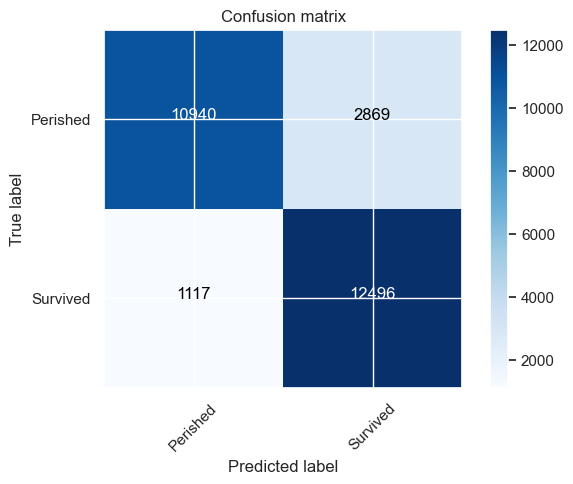

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,val_pre)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

/var/folders/4p/rtnyntns6_l1zn502sp8d1j80000gn/T/ipykernel_25780/3942899033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val,color='r',label='Actual Value')
/var/folders/4p/rtnyntns6_l1zn502sp8d1j80000gn/T/ipykernel_25780/3942899033.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(va

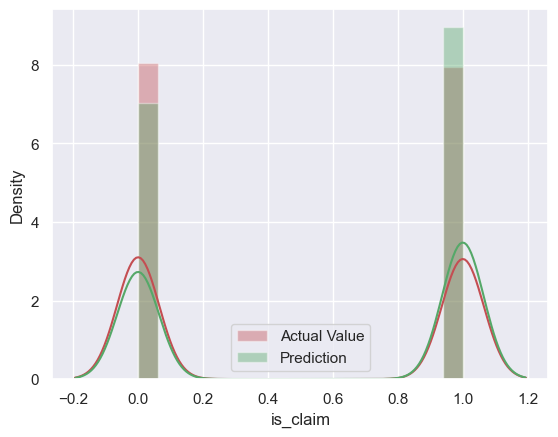

In [65]:
sns.distplot(y_val,color='r',label='Actual Value')
sns.distplot(val_pre,color='g',label='Prediction')
plt.legend()

# Submision

In [66]:
# prediction for test data 
y_test_pre=GBM.predict(x_test_stack)

In [67]:
# combine with our data
test_df["is_claim"]=y_test_pre

In [68]:
test_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID58593,0.341732,0.00,0.586538,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,ID58594,0.307241,0.13,0.442308,20,8794,1,2,7,2,...,1,1,1,1,1,1,1,1,2,0
2,ID58595,0.327924,0.12,0.451923,20,8794,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0
3,ID58596,0.782654,0.01,0.461538,17,34738,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,ID58597,1.233404,0.02,0.634615,17,34738,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [69]:
# submission
submission=test_df[['policy_id','is_claim']]
submission.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0


In [70]:
submission.to_csv('submission_rf.csv', index=False)